# Gene Expression anasylis and clustering using Birch

In [1]:
"""
Read the dataset
 1. Perform the PCA
 2. Do a visualization on PCA and unnderstand the distribution of visualization
 3. Clutering the PCA using Birch
 4. Visualize the formed cluster
 5. Cluster using the Birch
 6. Visualize the Cluster
 7. Do the Data normalization
 8. Apply PCA on normalized data
 9. Visualize the PCA
 10. Cluster the normalized the PCA data
 11. Visualize the cluster centers
 12. Cluster the Normalized data using Birch
 13. Visualize the Cluster center
 14. Prepare the conclusion on perfomance of birch on PCA, Actual Data, Normalized PCA. Normalized Data
"""

'\nRead the dataset\n 1. Perform the PCA\n 2. Do a visualization on PCA and unnderstand the distribution of visualization\n 3. Clutering the PCA using Birch\n 4. Visualize the formed cluster\n 5. Cluster using the Birch\n 6. Visualize the Cluster\n 7. Do the Data normalization\n 8. Apply PCA on normalized data\n 9. Visualize the PCA\n 10. Cluster the normalized the PCA data\n 11. Visualize the cluster centers\n 12. Cluster the Normalized data using Birch\n 13. Visualize the Cluster center\n 14. Prepare the conclusion on perfomance of birch on PCA, Actual Data, Normalized PCA. Normalized Data\n'

## Import the Libraries

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from  sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

## Read the dataset

In [3]:
original_df = pd.read_excel("./dataset/data_set_ALL_AML_train.xlsx")


In [4]:
feature_length = len(original_df.columns)
print("Feature size is", feature_length)

Feature size is 38


## Perfrom the PCA & Visualize

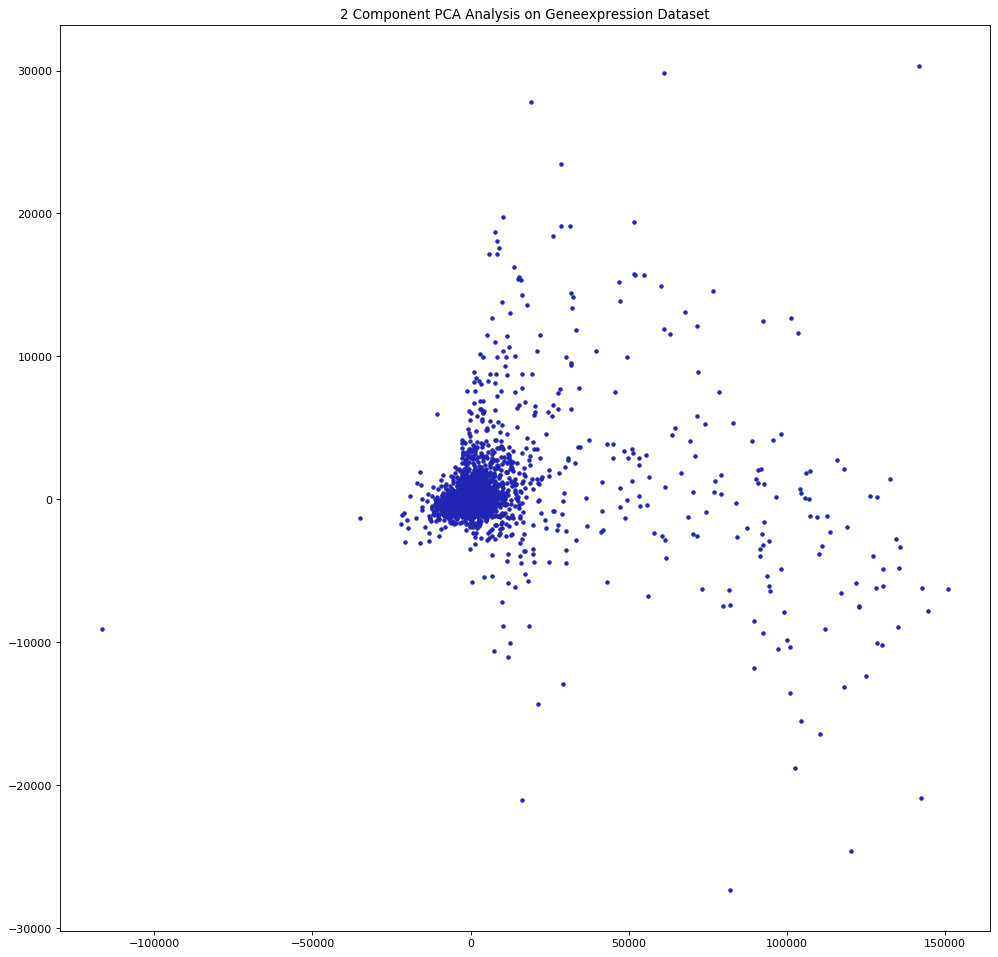

In [5]:
pca = PCA(2)
pca_data = pca.fit_transform(original_df)
clr1 =  '#2026B2'
fig = plt.figure(figsize=(15, 15), dpi=80)
ax1 = fig.add_subplot(111)
ax1.set_title("2 Component PCA Analysis on Geneexpression Dataset")
ax1.plot(pca_data[:, 0], pca_data[:, 1], '.', mfc=clr1, mec=clr1)
plt.show()

## Cluster the PCA data using Birch

In [6]:
birch = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,threshold=2000)
birch.fit_transform(pca_data)

array([[  1192.18636407,  18888.97653712,  16826.32457666, ...,
        149678.60740522, 137405.18507761, 106633.62314773],
       [  1370.59724033,  19087.3952583 ,  17024.12877048, ...,
        149838.70075205, 137585.15844833, 106823.64981763],
       [   546.14485578,  18376.62373819,  16234.99834554, ...,
        149034.39625531, 136760.86932129, 106003.85703127],
       ...,
       [   328.46843367,  18164.5554258 ,  16009.914553  , ...,
        148826.310816  , 136539.34420185, 105777.83719931],
       [  2994.94195795,  16601.71185299,  13781.52001133, ...,
        145601.73469965, 133523.73772913, 102984.68976073],
       [   624.43066837,  18438.04351035,  16306.3563648 , ...,
        149112.70096435, 136839.073578  , 106080.20511584]])

In [7]:
print(f"Cluster Size with threshold {birch.threshold} is ", len(birch.subcluster_centers_))

Cluster Size with threshold 2000 is  136


## Visualize the cluster centers

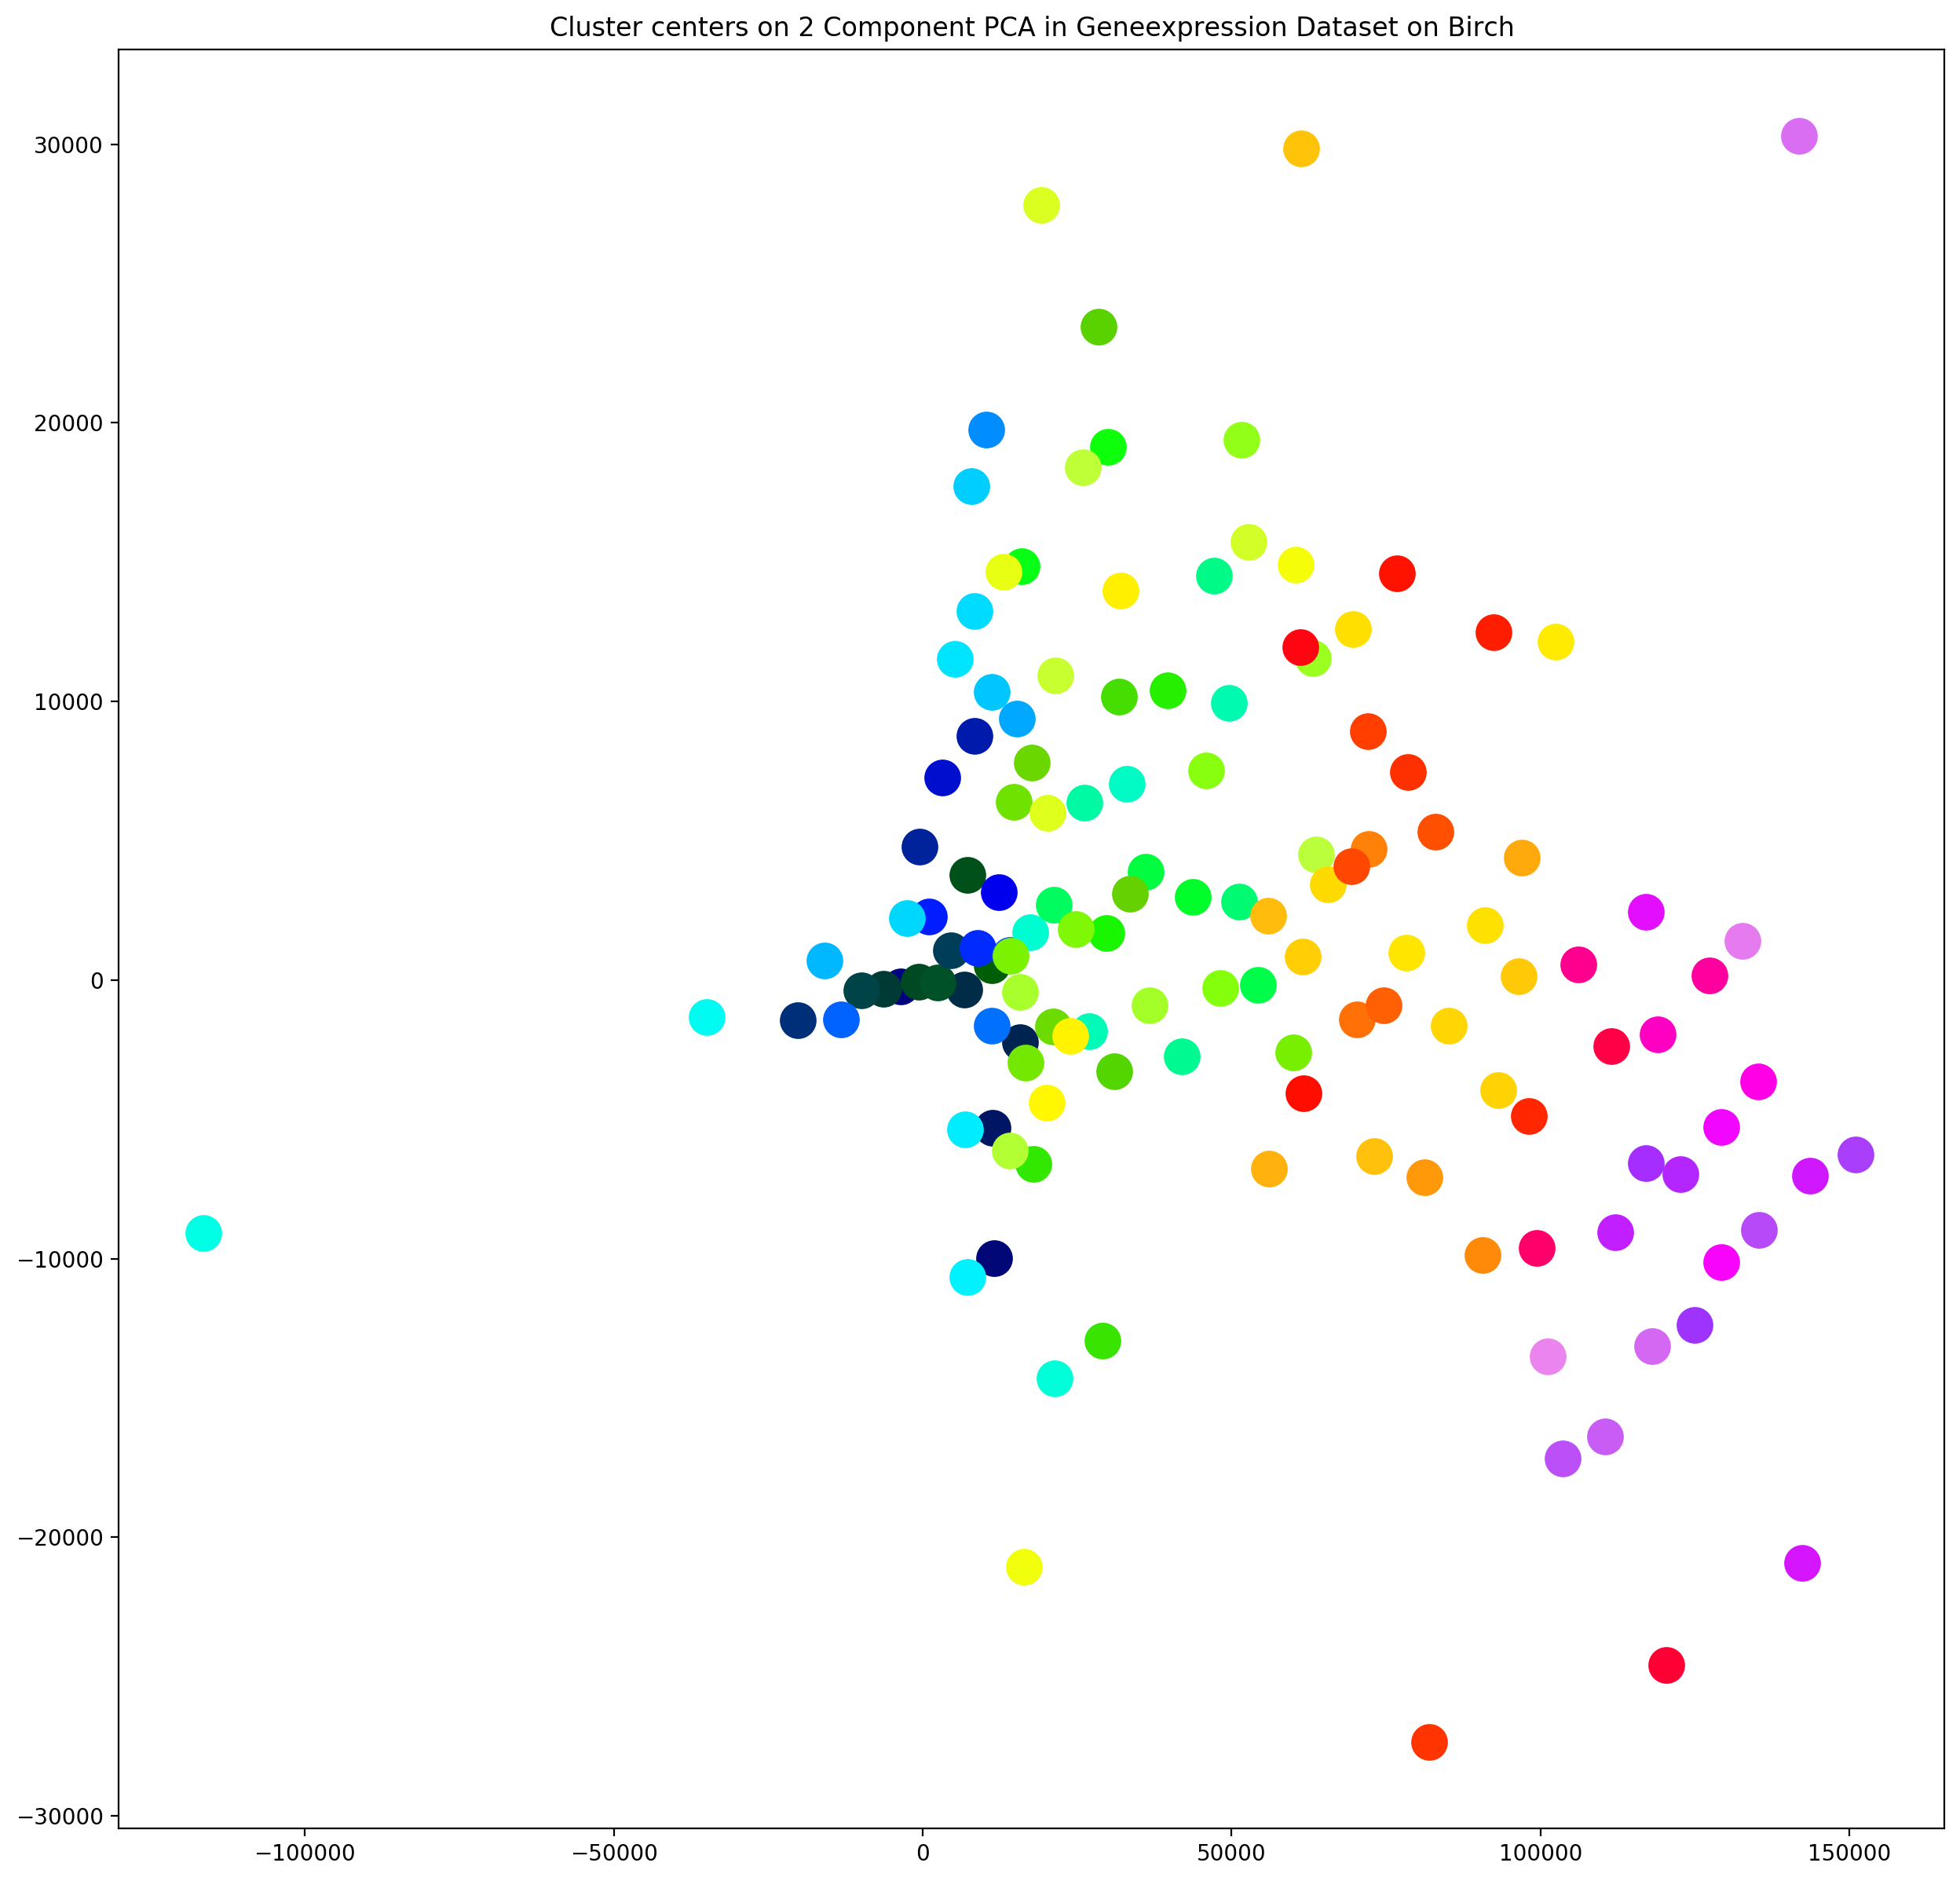

In [8]:
cluster_centers = birch.subcluster_centers_
labels = birch.labels_
fig = plt.figure(figsize=(15, 15), dpi=200)
ax = fig.add_subplot(111)
ax.set_title("Cluster centers on 2 Component PCA in Geneexpression Dataset on Birch")
for x,y,lab in zip(cluster_centers[:, 0],cluster_centers[:, 1],labels):
        ax.scatter(x,y,label=lab, s= 250)
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


## Apply the datanormalization on expression dataset

In [9]:
x = original_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

## Apply PCA on Normalized data & Visulaize

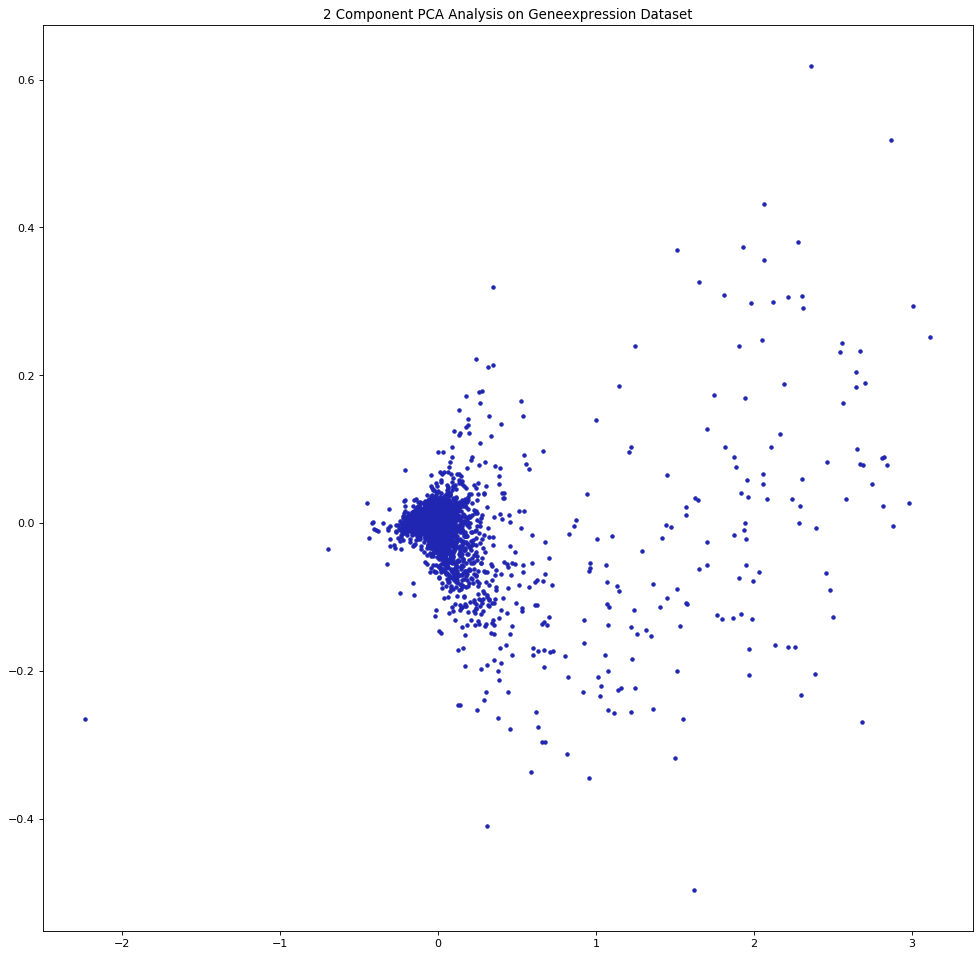

In [10]:
pca = PCA(2)
pca_norm_data = pca.fit_transform(df_normalized)
clr1 =  '#2026B2'
fig = plt.figure(figsize=(15, 15), dpi=80)
ax1 = fig.add_subplot(111)
ax1.set_title("2 Component PCA Analysis on Geneexpression Dataset")
ax1.plot(pca_norm_data[:, 0], pca_norm_data[:, 1], '.', mfc=clr1, mec=clr1)
plt.show()

## Cluster the normalized PCA Data using Birch

In [11]:
birch = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,threshold=0.03)
birch.fit_transform(pca_norm_data)

array([[1.77772728, 1.93402283, 2.16275163, ..., 0.58845968, 0.34377468,
        0.79760357],
       [1.78204509, 1.93840016, 2.16741782, ..., 0.59328425, 0.34874317,
        0.80258664],
       [1.76609317, 1.92239108, 2.15126078, ..., 0.57721409, 0.33311308,
        0.78705617],
       ...,
       [1.76088418, 1.91708391, 2.14546073, ..., 0.57111632, 0.32668551,
        0.78059548],
       [1.70130177, 1.85780075, 2.08853823, ..., 0.51714672, 0.27897351,
        0.73241461],
       [1.76674551, 1.92300543, 2.15165439, ..., 0.57743649, 0.33307278,
        0.78697955]])

## Visualize the cluster centers

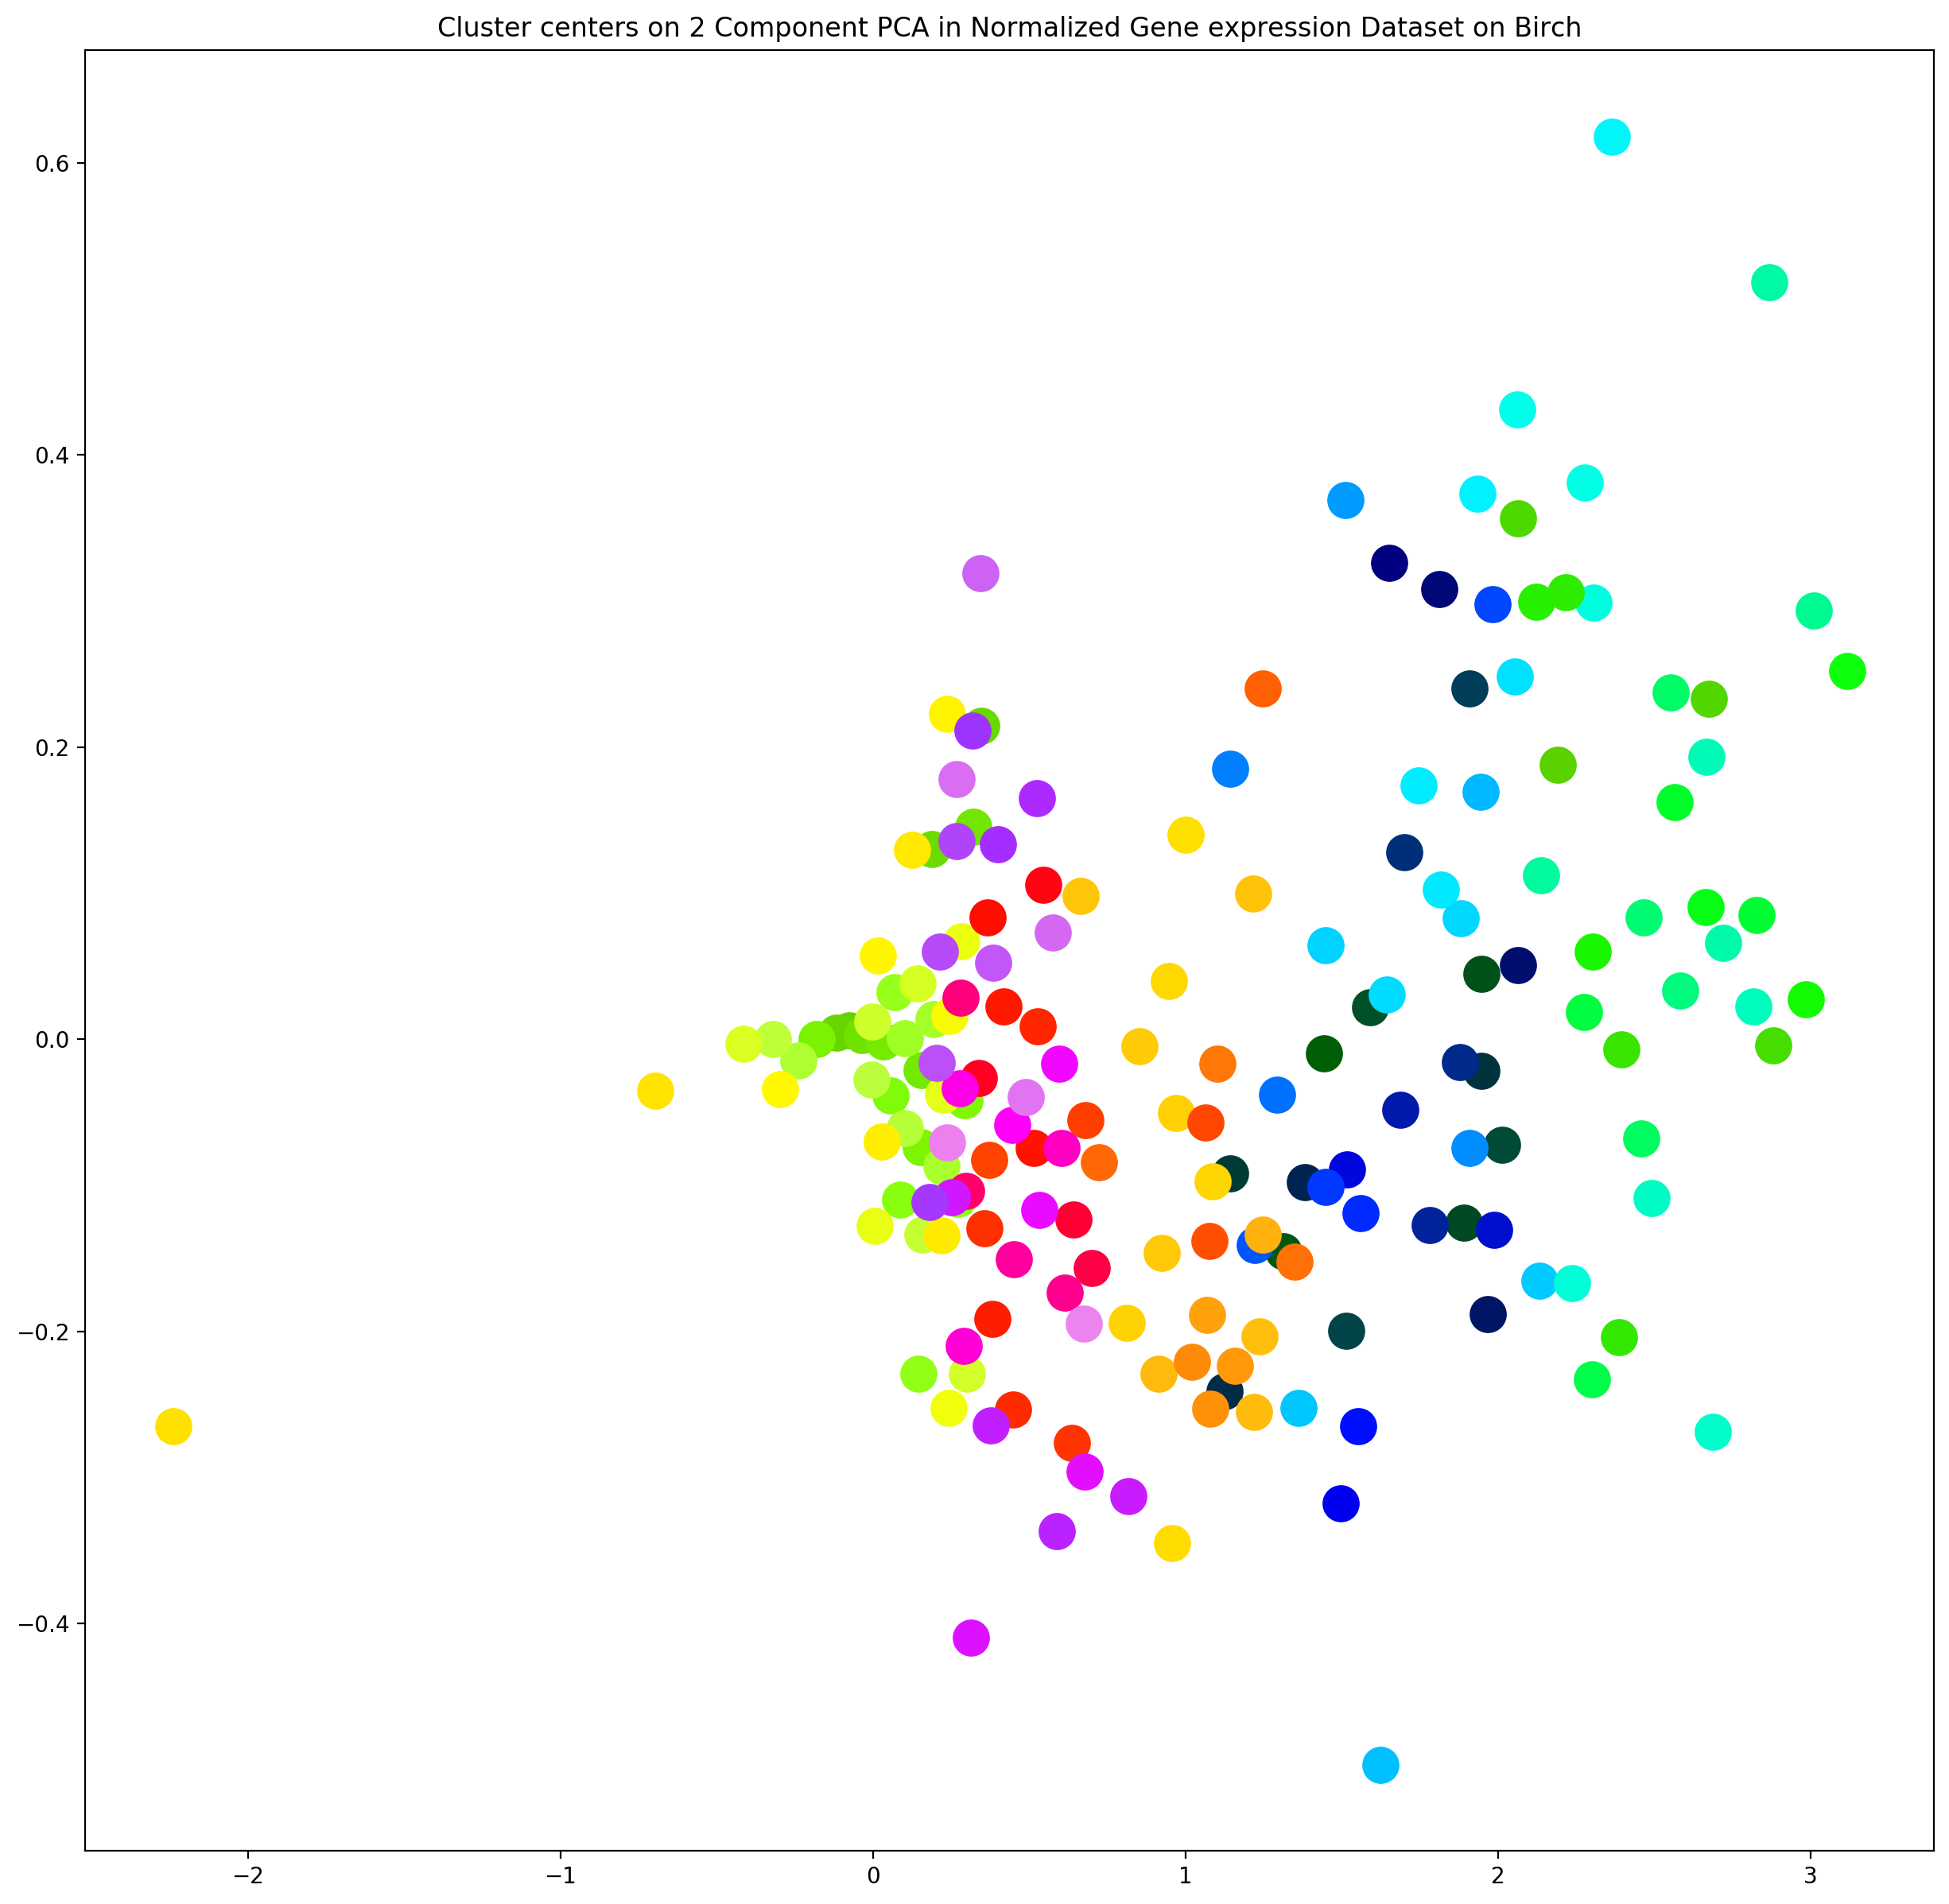

In [12]:
cluster_centers = birch.subcluster_centers_
labels = birch.labels_
fig = plt.figure(figsize=(15, 15), dpi=200)
ax = fig.add_subplot(111)
ax.set_title("Cluster centers on 2 Component PCA in Normalized Gene expression Dataset on Birch")
for x,y,lab in zip(cluster_centers[:, 0],cluster_centers[:, 1],labels):
        ax.scatter(x,y,label=lab, s= 250)
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


In [13]:
pca_norm_data

array([[-0.09738828,  0.00723288],
       [-0.10208897,  0.0089527 ],
       [-0.08593519,  0.00927766],
       ...,
       [-0.0800727 ,  0.00619105],
       [-0.02348623,  0.02806999],
       [-0.0862967 ,  0.00762747]])

## Cluster the original data using Birch

In [14]:
birch = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,threshold=2000)
birch.fit_transform(original_df)


array([[ 88002.78687633, 105318.66211171, 113138.33736625, ...,
         86379.32270515,  68580.24286192,  69379.69001804],
       [ 88183.61524115, 105500.42223612, 113330.61985624, ...,
         86521.78631998,  68732.31007321,  69484.93482763],
       [ 87384.84630072, 104665.48919295, 112535.71823648, ...,
         85762.28896199,  67909.26119463,  68737.21262897],
       ...,
       [ 87237.3280368 , 104452.19852162, 112290.39236284, ...,
         85531.57274364,  67760.58509192,  68497.55188326],
       [ 84463.16268054, 101908.63039507, 109521.11425657, ...,
         82557.92699069,  64864.83686097,  65671.42181345],
       [ 87520.32529076, 104749.17214947, 112587.73404328, ...,
         85797.82266468,  68041.62042456,  68774.4285327 ]])

## Visualize the cluster centers

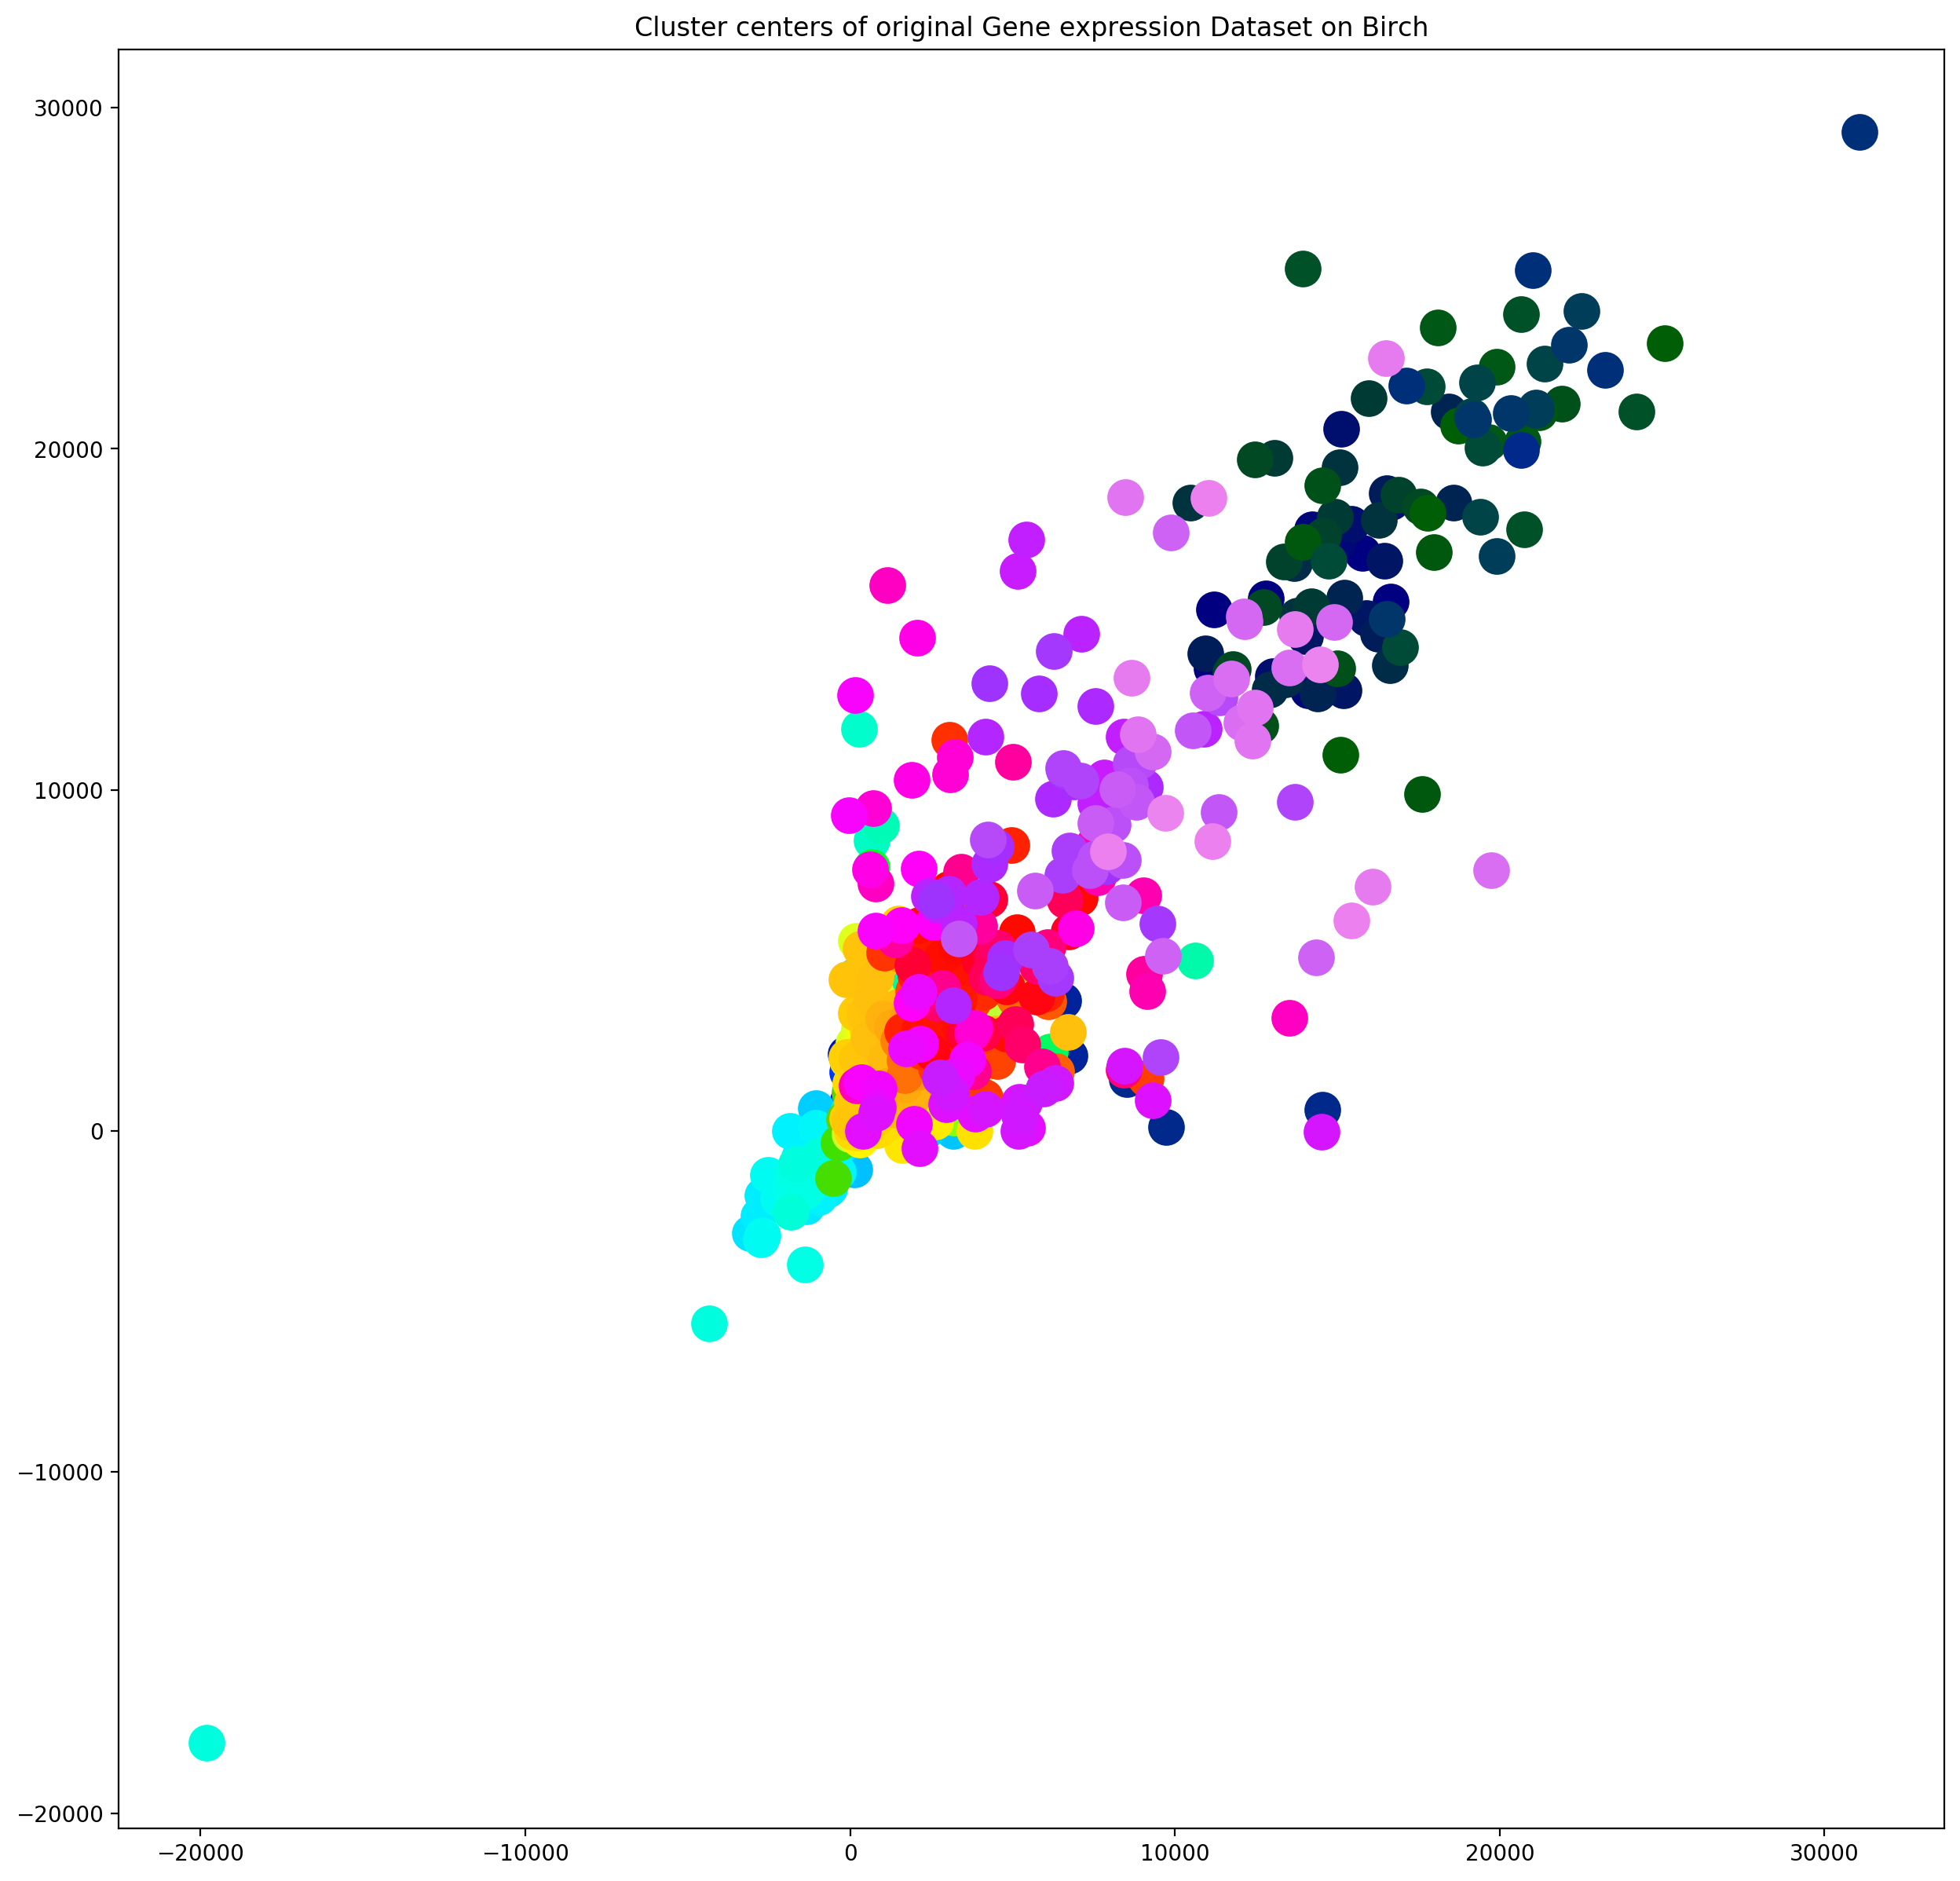

In [15]:
cluster_centers = birch.subcluster_centers_
labels = birch.labels_
fig = plt.figure(figsize=(15, 15), dpi=200)
ax = fig.add_subplot(111)
ax.set_title("Cluster centers of original Gene expression Dataset on Birch")
for x,y,lab in zip(cluster_centers[:, 0],cluster_centers[:, 1],labels):
        ax.scatter(x,y,label=lab, s= 250)
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

## Clustering Normalized data without PCA using Birch

In [16]:
birch = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,threshold=0.2)
birch.fit_transform(df_normalized)

array([[0.0419343 , 0.24643432, 0.65790854, ..., 2.01599312, 1.77120875,
        1.98009743],
       [0.0456531 , 0.25057855, 0.65919932, ..., 2.0210716 , 1.77506732,
        1.98446128],
       [0.031754  , 0.2346156 , 0.6520189 , ..., 2.00480446, 1.76000454,
        1.96804389],
       ...,
       [0.02281483, 0.22843564, 0.64708188, ..., 1.99977081, 1.75451935,
        1.96286282],
       [0.09600421, 0.19689804, 0.63110468, ..., 1.94241891, 1.69866303,
        1.91638635],
       [0.02928007, 0.23495708, 0.65051087, ..., 2.00588833, 1.76008127,
        1.96864045]])

## Visualise the cluster centers

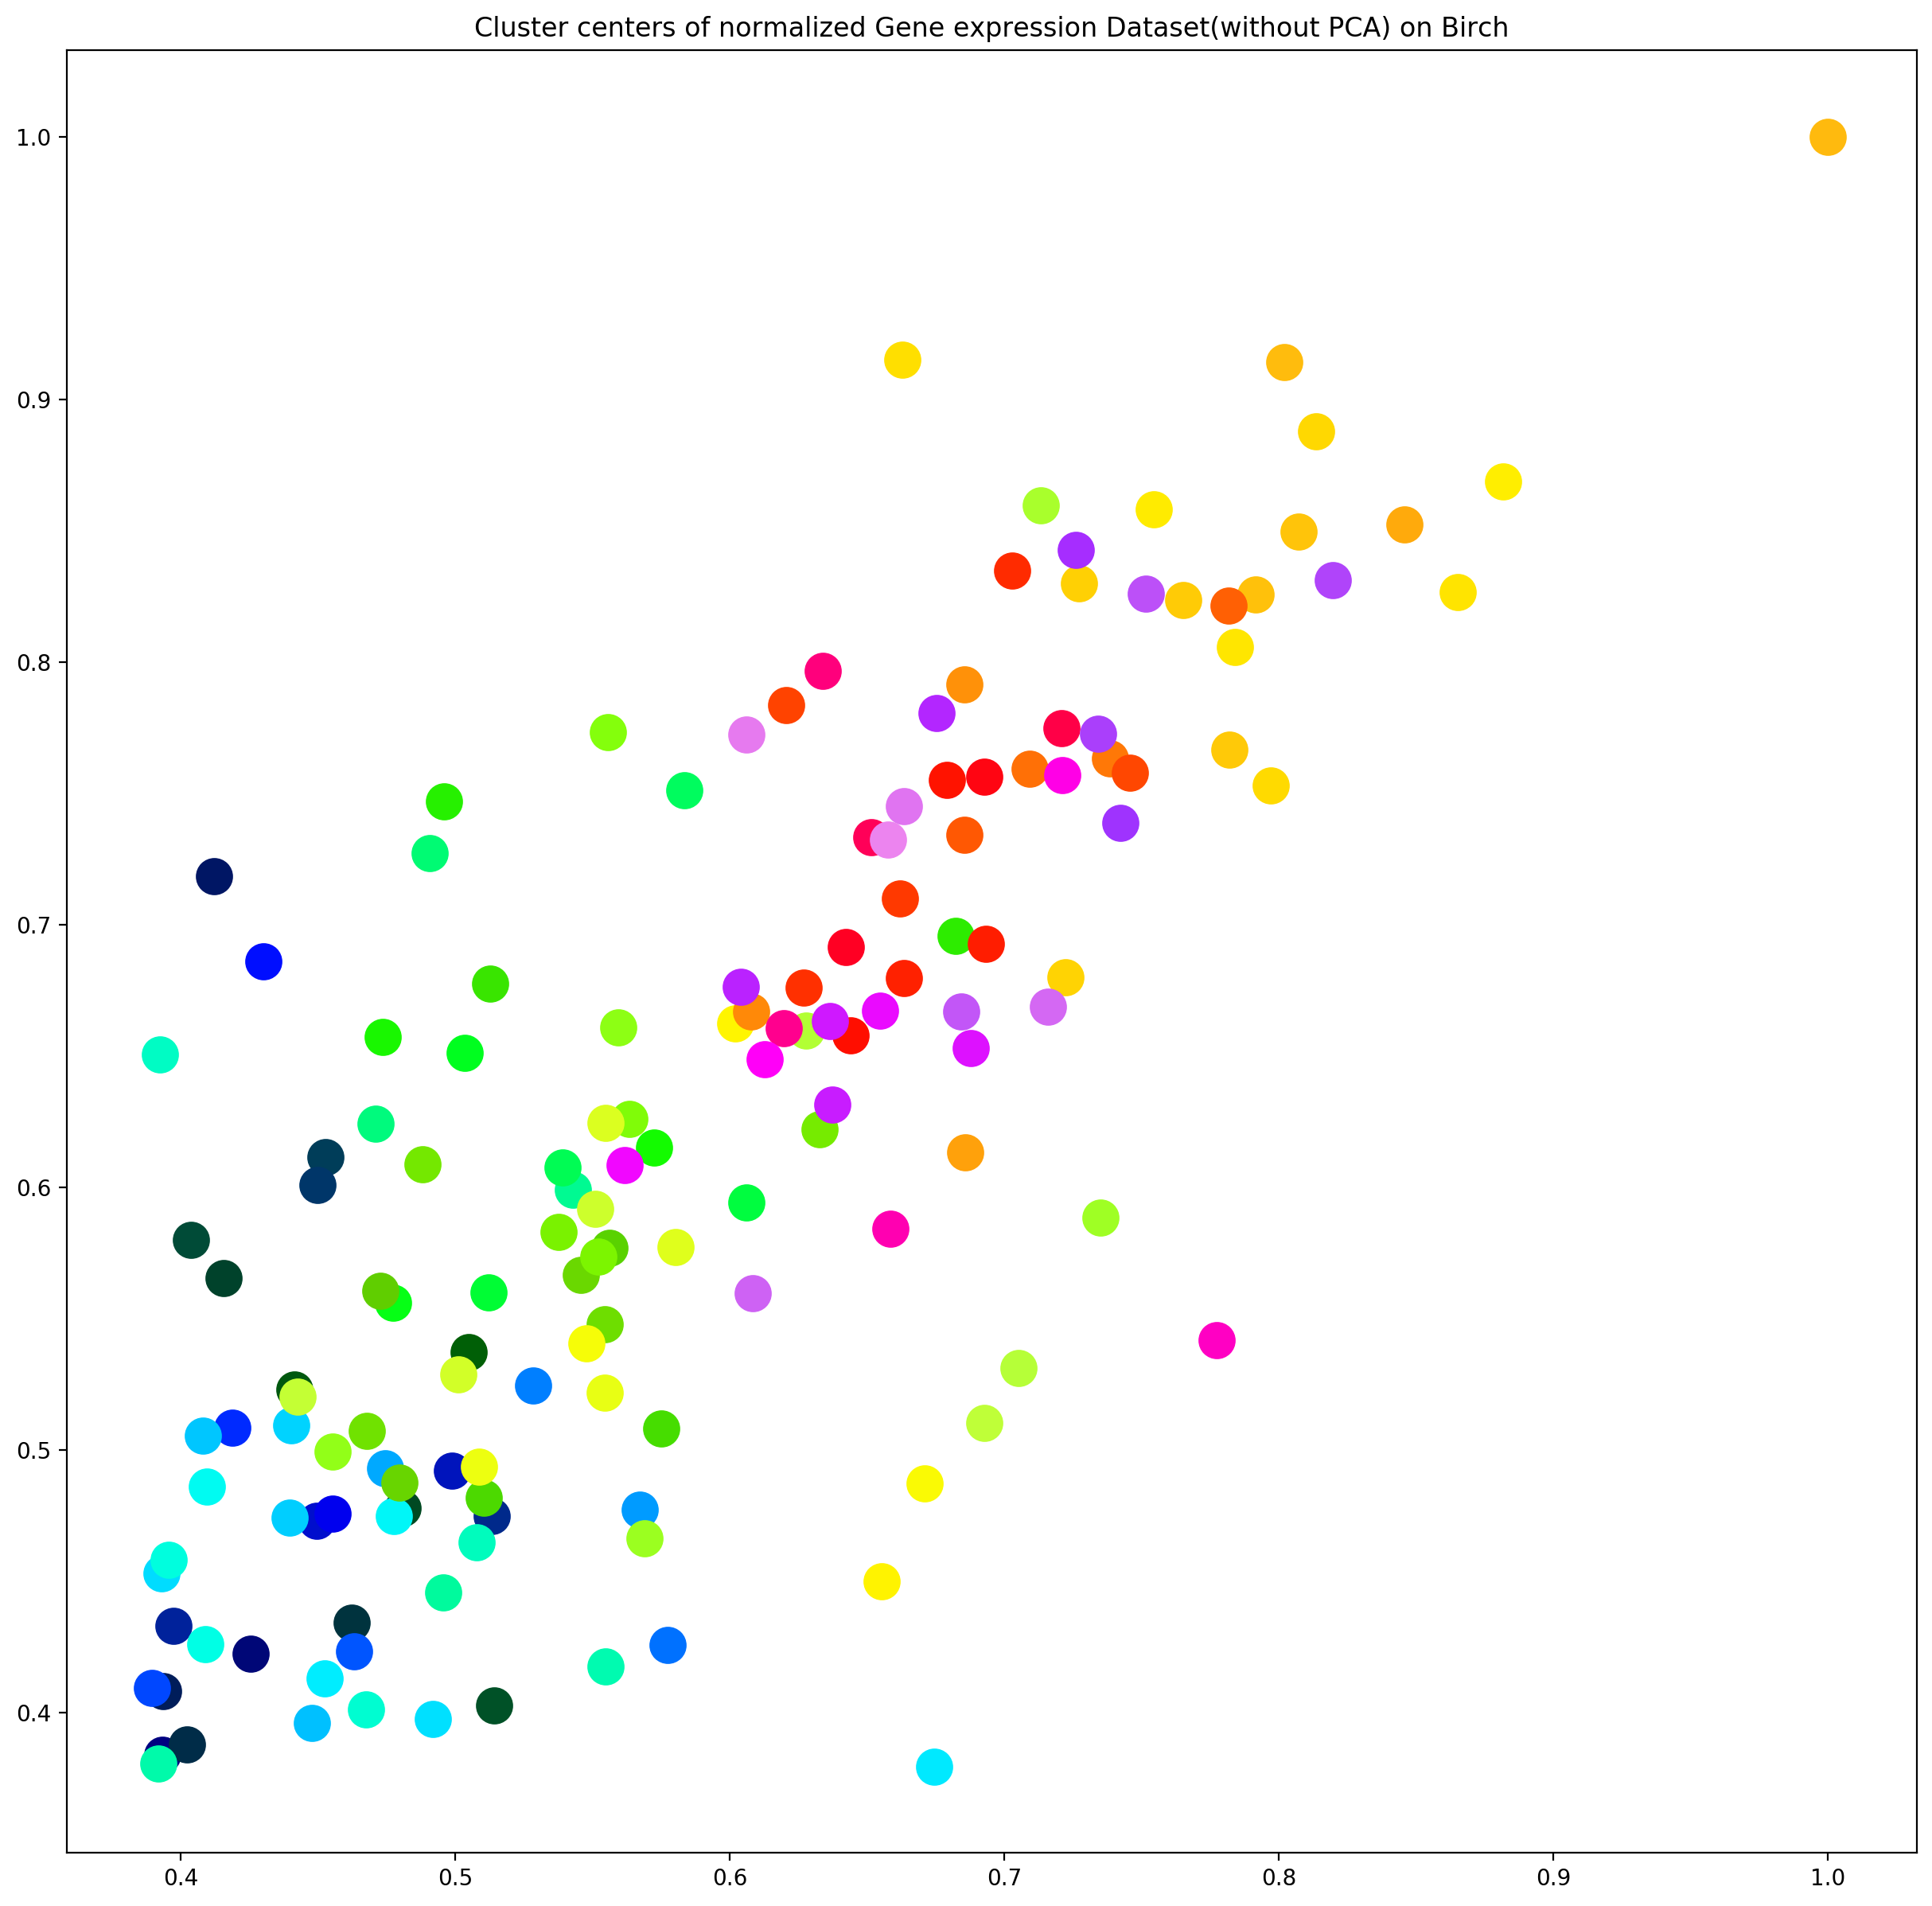

In [17]:
cluster_centers = birch.subcluster_centers_
labels = birch.labels_
fig = plt.figure(figsize=(15, 15), dpi=200)
ax = fig.add_subplot(111)
ax.set_title("Cluster centers of normalized Gene expression Dataset(without PCA) on Birch")
for x,y,lab in zip(cluster_centers[:, 0],cluster_centers[:, 1],labels):
        ax.scatter(x,y,label=lab, s= 250)
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])